<a href="https://colab.research.google.com/github/deviandinifebrianti/Machine-Learning/blob/main/Praktikum_4_%26_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=689bd50a1c27e3b10d2ecb6fbe175492dc2727a89cb14acfc96fcc4021849bb6
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [4]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [5]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [6]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [7]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [8]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
from skimage import io
Lenna = "Lenna.png"
Lenna = io.imread(Lenna) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [11]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

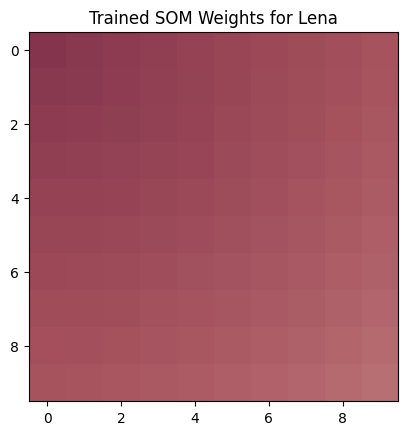

In [10]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

## Tugas

### Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

# Jawab

## **1.  Gunakan data 'Mall_Customers.csv'**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

mc = pd.read_csv('Mall_Customers.csv')

mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
# Cek apakah ada yang hilang datanya
mc.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [76]:
# Info
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## **2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

In [77]:
mc.drop(["CustomerID"], axis = 1, inplace=True)
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


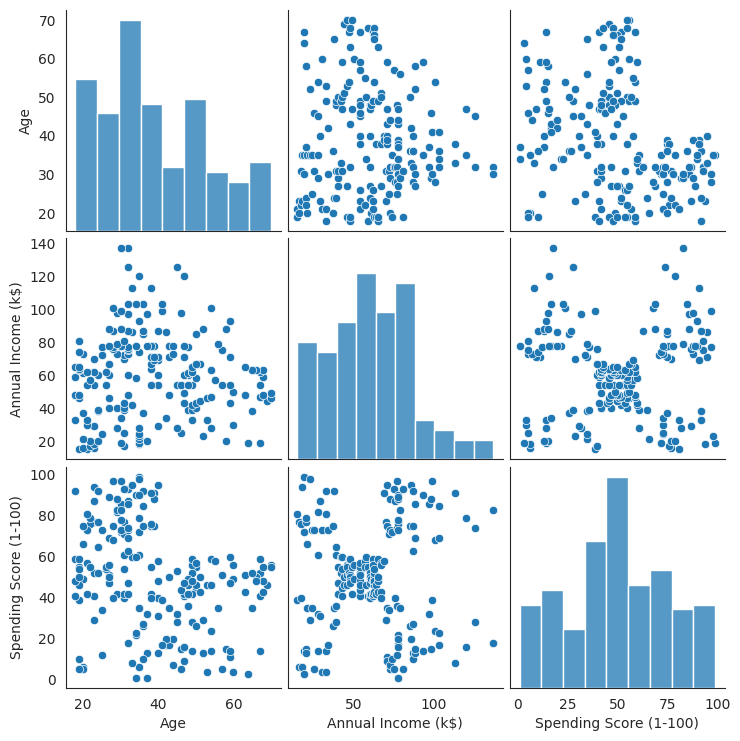

In [78]:
sns.pairplot(mc[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

## **3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.**

In [79]:
mc1 = mc [['Age','Annual Income (k$)','Spending Score (1-100)']]
print(mc1)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


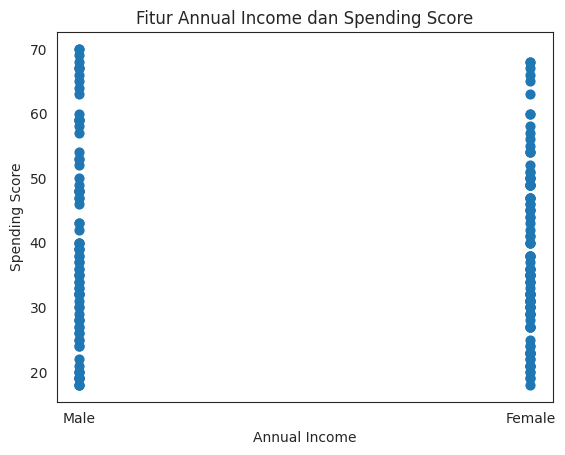

In [80]:
plt.title("Fitur Annual Income dan Spending Score")
plt.scatter(mc.iloc[:, 0], mc.iloc[:, 1], s=40)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [81]:
# Melatih model K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Spending Score')

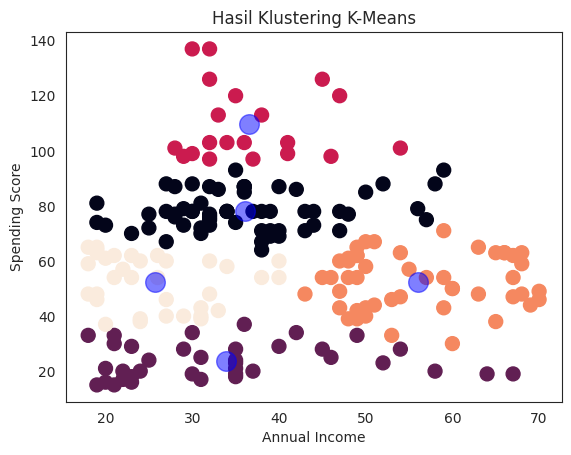

In [89]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [83]:
# Cek Nilai SSE
print(f'Nilai SSE: {kmeans.inertia_}')

Nilai SSE: 31976.05381449878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

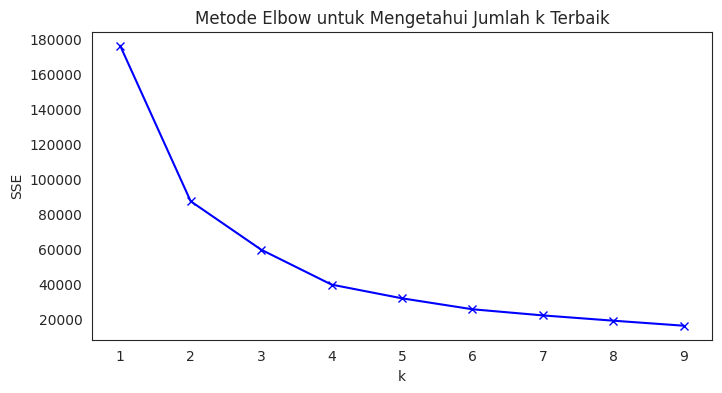

In [84]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [85]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1): print(f'k={idx}; SSE={sse_val}')

k=1; SSE=176108.78000000003
k=2; SSE=87179.72383252817
k=3; SSE=59486.961439280356
k=4; SSE=39502.77850064538
k=5; SSE=31662.412142758716
k=6; SSE=25399.02200441699
k=7; SSE=21891.08336555917
k=8; SSE=18873.469208042145
k=9; SSE=15993.235556656888


## **4. Buatlah implementasi model SOM untuk segmentasi citra lain**

In [90]:
pip install minisom

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [94]:
# inisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [95]:
# hitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [96]:
# menemukan indeks unit pemenang
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [97]:
# perbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(
        weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * \
        influence[:, :, np.newaxis] * (input_vector - weights)

In [98]:
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # Ukuran SOM sesuai dengan jumlah saluran warna
    som_shape = (32, 32, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * \
            np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner,
                               learning_rate, neighborhood_radius)

    return weights

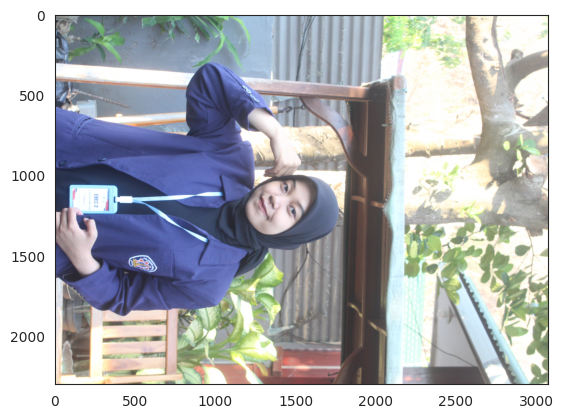

In [102]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
from skimage import io
devi = "devi.JPG"
devi = io.imread(devi) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]
plt.imshow(devi)

In [ ]:
# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 1
trained_weights = train_som(devi, num_epochs, initial_learning_rate, initial_neighborhood_radius)